<h1><center> Happiness Within Countries </center></h1>

<h4><center> Iris Truong, Jason Zhong, Yun Qi <h4><center>

<h2><center>Introduction</center></h2>

Humans are complex beings and hard to gauge how things are going. As so, happiness is also a hard aspect to gauge with data. The welfare of humanity is an important aspect that we should care about. This is especially important to world organizations like the WHO and the UN. The UN even has a <a href= https://www.un.org/en/observances/happiness-day>day</a> dedicated celebrating the happiness in the culture of people around the world. There have been independent researches done by the <a href= https://worldhappiness.report/archive/>World Happiness Report</a> on how happy people are in the world. In the <a href= https://worldhappiness.report/ed/2020/>2020</a>  report, the WHR discusses in detail what categories they used to group the variables. It discusses how the environment affects the happiness of the population, especially different social environments like connections and institutions in its country. The report then continues to discuss the differences in happiness in urban areas compared to other places. The report is an interesting analysis of what determines happiness for people around the world and bring it to an analytic point of view.

In this tutorial, we will be using this <a href= https://www.kaggle.com/mathurinache/world-happiness-report>dataset</a> from Kaggle which was gathered from the WHR. Our goal is to tidy up the data given to us and provide insight what the data tells us. We would like to see if there is a formula that would tell us how effective a each variable is in affect the happiness of people. In addition, using the data we could see any continuity of how the world changes overtime as people may value certain factors over the years. There could be other groupings we could look at like different regions might value happiness or whether first and third world countries have different values. Finally, with the given results we could compare the results with other analysis on happiness and see if there any difference between the analysis. We hope to show the progression of humanity as time goes on, the measure of happiness would shift to something else as more technology becomes avaliable and different philosophy rises. Hopefully we can teach people about how different countries sees happiness.

<h2><center>Preparing the Data</center></h2>

Using Python3 we will import some libraries to help with the data munging, analysis, and visual representation. The libraries imported are <a href= https://pandas.pydata.org/>pandas</a> as pd for orginizing the data, <a href= https://matplotlib.org/contents.html>matplotlib.pyplot</a> as plt for visualizations, <a href= https://scikit-learn.org/stable/>sklearn</a> for training the linear regression model, and <a href= https://numpy.org/doc/stable/user/>numpy</a> as np for math operation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Before the data can be used to we have to import it into the notebook and clean up the data so then it can be managable, easier to represent, and help withe the analysis. So we downloaded the files from the website and put it into the github repository in a so then we can read from them. Then using pandas csv reader we were able to read the files and put them into pandas dataframes.

In [2]:
data2015 = pd.read_csv("Data/2015")
data2016 = pd.read_csv("Data/2016")
data2017 = pd.read_csv("Data/2017")
data2018 = pd.read_csv("Data/2018")
data2019 = pd.read_csv("Data/2019")
data2020 = pd.read_csv("Data/2020")

The data collected by the WHR differed from year to year as they gathered information that they thought was important to the research they were doing and some columns were renamed. For example in the 2015 data, there is a feature called family while in 2020 family was replaced with social support. The columns of each dataset are named differently but represents the same informations. For example "Freedom" for one year could be "Explained by: Freedom to make life choices" in another year. So these columns would have to be renamed so it would be easier to merge the datasets into one big set.

In [3]:
data2020['Happiness Rank'] =  range(1, len(data2020.index)+1)
data2020['Year'] = "2020"

In [4]:
# Drop the extraneous generosity so that concat can work later on in the code
data2020 = data2020.drop(['Generosity'], axis = 1)

data2020 = data2020.rename(columns = {'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Happiness Score', 
                        'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)', 'Explained by: Social support' : 'Family', 
                                    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Explained by: Freedom to make life choices' : 'Freedom', 
                                    'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)',
                                      'Explained by: Generosity' : 'Generosity',
                                     'Standard error of ladder score' : 'Standard Error', 'Regional indicator' : 'Region'})

In [5]:
#Just renaming some regions in 2020 as they changed some regions around. Commonwealth of Independent States are all
#Central and Eastern European countries. The Asian regions the report decided to use the noun versions of the
#cardinal directions rather the adjectives.
data2020['Region'] = data2020['Region'].replace(['Commonwealth of Independent States'],'Central and Eastern Europe')
data2020['Region'] = data2020['Region'].replace(['South Asia'],'Southern Asia')
data2020['Region'] = data2020['Region'].replace(['Southeast Asia'],'Southeastern Asia')
data2020['Region'] = data2020['Region'].replace(['East Asia'],'Eastern Asia')
data2020['Region'] = data2020['Region'].replace(['Middle East and North Africa'],'Middle East and Northern Africa')

In [6]:
#Split North America regions from Australia and New Zealand
for i, row in data2020.loc[data2020['Region'] == 'North America and ANZ'].iterrows():
    if row['Country'] == 'United States' or row['Country'] == 'Canada':
        data2020.at[i,'Region'] = 'North America'
    else:
        data2020.at[i,'Region'] = 'Australia and New Zealand'

In [7]:
data2020

,Country,Region,Happiness Score,Standard Error,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,149,2020
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,150,2020
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,151,2020
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,152,2020


In [8]:
# temp is just a table for the merge to be conducted on to match countries with their regions
temp = data2016[['Country','Region']]

In [9]:
data2019 = data2019.rename(columns = {'Overall rank' : 'Happiness Rank', 'Country or region' : 'Country', 
                                      'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)',
                                      'Social support': 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Perceptions of corruption' : 'Trust (Government Corruption)'})
#Matches the countries with their repective regions
data2019 = pd.merge(data2019, temp, how='left', on=['Country'])
data2019['Year'] = "2019"
data2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,2019
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN,2019


In [10]:
data2018 = data2018.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 'Country or region':'Country', 'Overall rank':'Happiness Rank',
                                      'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)',
                                      'Social support': 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Perceptions of corruption' : 'Trust (Government Corruption)'})
data2018 = pd.merge(data2018, temp, how='left', on=['Country'])
data2018['Year'] = "2018"
data2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2018
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,NaN,2018


In [11]:
data2017 = data2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 'Country or region' : 'Country', 
                                      'Happiness.Score' : 'Happiness Score', 'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                                      'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Trust..Government.Corruption.' : 'Trust (Government Corruption)'})
data2017 = pd.merge(data2017, temp, how='left', on=['Country']).dropna()
data2017['Year'] = "2017"

In [12]:
data2016['Year'] = "2016"
data2015['Year'] = "2015"

In [13]:
data2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [14]:
data2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


The dataAll contains a concatenation of all 6 years. The dropna was used to drop and pieces of data that contained any missing values, specifically missing values in the region column as it is a categorical data, we cannot extrapolate data because we do not know what WHR's standards are for placing countries into different regions.

In [15]:
dataAll = pd.concat([data2020,data2019,data2018,data2017,data2016,data2015])
dataAll=dataAll[['Country','Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year',]].dropna()
dataAll

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,Western Europe,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020
1,Denmark,Western Europe,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2020
2,Switzerland,Western Europe,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,2020
3,Iceland,Western Europe,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,2020
4,Norway,Western Europe,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,2020
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.4650,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,2015
154,Benin,Sub-Saharan Africa,155,3.3400,0.286650,0.353860,0.319100,0.484500,0.080100,0.182600,2015
155,Syria,Middle East and Northern Africa,156,3.0060,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,2015
156,Burundi,Sub-Saharan Africa,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015


For the meaing of each column/variable refer to the index <a href= https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf>here</a>. The first two pages explain what the report asked in their survey and how it converted the information to numbers.

<h2><center>Linear Regression</center></h2>


### TO DO: Write up. Hapiness Score Across Years

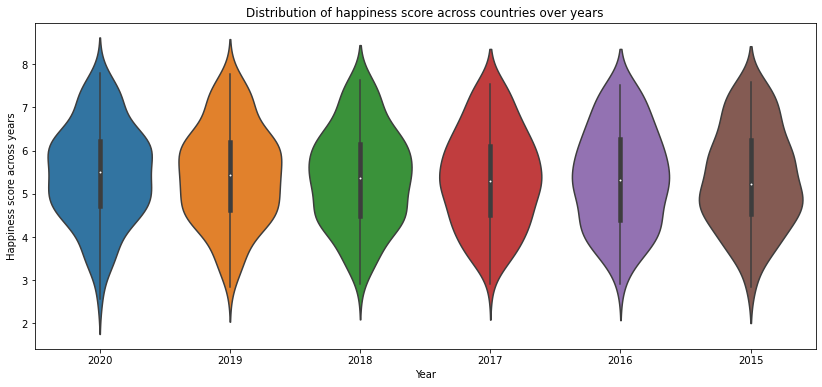

In [131]:
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings

#Plot the happiness score distribution
plt.figure(figsize=(14,6)) #Format figure size
sns.violinplot(x='Year', y='Happiness Score', data=dataAll).set( xlabel="Year", ylabel="Happiness score across years")
plt.title("Distribution of happiness score across countries over years")

# Show the plot
plt.show()

### TODO WRITEUP : It's hard to see which year has better happiness score. Let's see it by calculating the mean happiness score by year

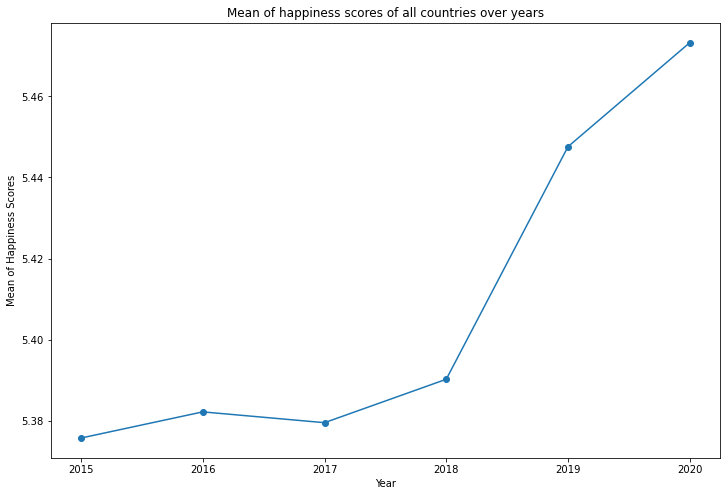

In [134]:
# Get mean of happiness score in all countries over years
mean_happiness_score_by_year_df = dataAll \
                                .groupby("Year")["Happiness Score"] \
                                .mean()

# Plot Mean of happiness scores of all countries over years
plt.figure(figsize=(12,8))
mean_happiness_score_by_year_df.plot (
    x="Year", y="Happiness Score",
    kind="line", marker="o",
    title="Mean of happiness scores of all countries over years",
    xlabel="Year", ylabel="Mean of Happiness Scores"
)

# Show the result
plt.show()

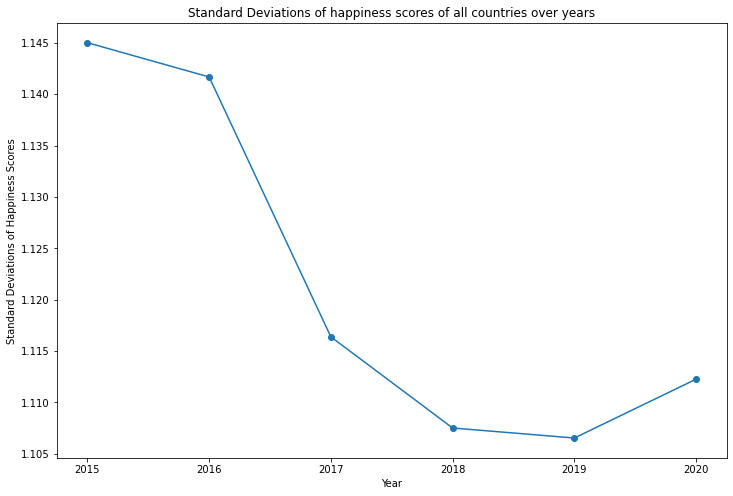

In [133]:
# Get stddev of happiness score in all countries over years
std_happiness_score_by_year_df = dataAll \
                                .groupby("Year")["Happiness Score"] \
                                .std()

# Plot Standard Deviations of happiness scores of all countries over years
plt.figure(figsize=(12,8))
std_happiness_score_by_year_df.plot (
    x="Year", y="Happiness Score",
    kind="line", marker="o",
    title="Standard Deviations of happiness scores of all countries over years",
    xlabel="Year", ylabel="Standard Deviations of Happiness Scores"
)

# Show the result
plt.show()

### TO DO: Write up. Mean is ... How about standard deviations?

### TODO: Happiness Score might depend on year. Lets predict by year.

Coefficient: 
 [0.01973356]
Intercept: 
 -34.404175810438126
Regression line:
 Happiness Score = -34.404175810438126 + Year * 0.019733564289423727 

Mean squared error: 1.25
R^2 score: 0.00


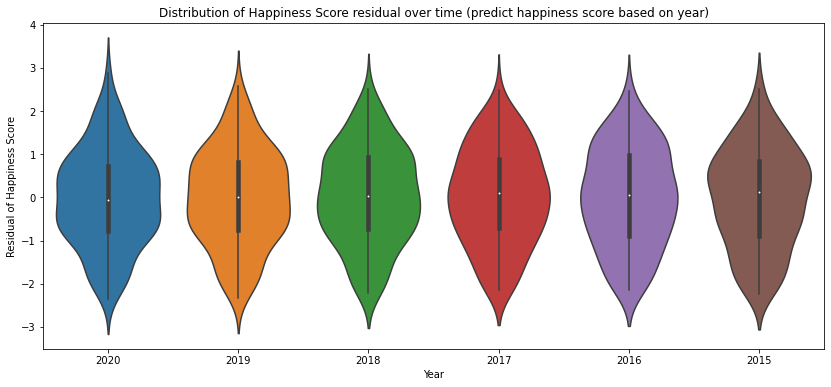

In [122]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get X and Y axes
year_X = dataAll['Year'].to_numpy().reshape(-1, 1)
happiness_Y = dataAll['Happiness Score']

# Linear Regression
regr = linear_model.LinearRegression()
regr.fit(year_X, happiness_Y)

# The coefficients
print('Coefficient: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# Regression line:
print(f'Regression line:\n Happiness Score = {regr.intercept_} + Year * {regr.coef_[0]} \n', )

# Get predicted value
happiness_Y_predict = regr.predict(year_X)

# Get mean squared error & R squared
print('Mean squared error: %.2f'
      % mean_squared_error(happiness_Y, happiness_Y_predict))
print('R^2 score: %.2f'
          % r2_score(happiness_Y, happiness_Y_predict))

#Get residual
Y_residual_1 = happiness_Y_predict - happiness_Y

# Add the residual column
dataAll['Happiness Residual 1'] = Y_residual_1

#Plot the residual distribution over years
plt.figure(figsize=(14,6)) #Format figure size
sns.violinplot(x='Year', y='Happiness Residual 1', data=dataAll) \
    .set( xlabel="Year", ylabel="Residual of Happiness Score")
plt.title("Distribution of Happiness Score residual over time (predict happiness score based on year)")

# Show the plot
plt.show()

### TODO: Mean is around 0 but residuals not normally distributed. We need to consider other factors. Also, mean square error is quite high. And R^2 is 0.0 shows that the model is bad. Let's try to draw the residual based on Regions

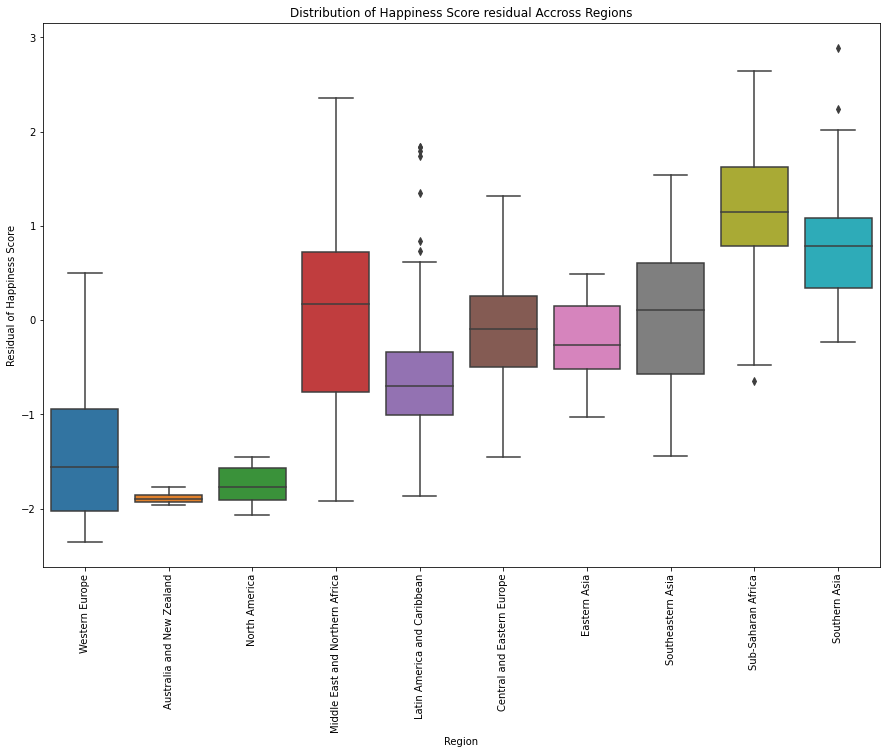

In [196]:
#Plot the residuals by regions
plt.figure(figsize=(15,10)) #Format figure size
sns.boxplot(x='Region', y='Happiness Residual 1', data=dataAll) \
    .set( xlabel="Region", ylabel="Residual of Happiness Score")
plt.xticks(rotation=90)
plt.title("Distribution of Happiness Score residual Accross Regions")

# Show the plot
plt.show()

### Write up: Residual changes over regions. Linear regression does depend on region. Now see mean happiness by reagion in each year

<Figure size 432x288 with 0 Axes>

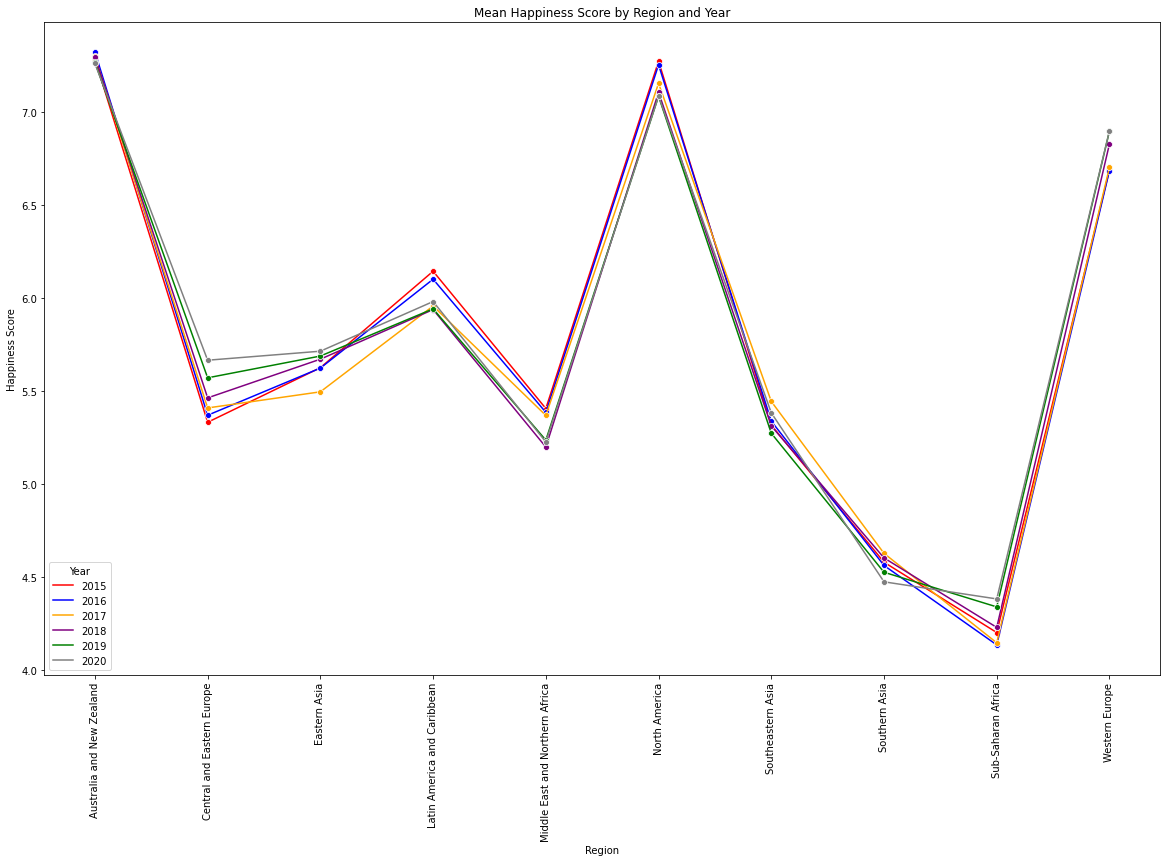

<Figure size 432x288 with 0 Axes>

In [154]:
# Get means of happiness score by year and region
mean_score_yr_region = dataAll.groupby(["Year", "Region"])["Happiness Score"].mean()

# Create a dataframe
frame = { 'Happiness Score': mean_score_yr_region }
mean_score_yr_region_df = pd.DataFrame(frame)

# Plot the mean of happiness score over years accross regions
plt.figure(figsize=(20,12))
ax = sns.lineplot(data=mean_score_yr_region_df,
                x='Region', y='Happiness Score',
                hue='Year', marker="o",
                palette=["red", "blue", "orange", "purple", "green", "gray" ])
plt.xticks(rotation=90) #Make x labels vertical
plt.xlabel("Region")
plt.title("Mean Happiness Score by Region and Year")
plt.figure()

# TODO: Writeup. Confirm that happiness score changed accross regions

### MAKE LINEAR REGRESSION BASED ON YEAR AND REGION

In [129]:
### Function to assign values for dummy variables for region
def label_continent(row, region):
    if row['Region'] == region:
        return 1
    else:
        return 0
    
#Add new columns for regions
dataAll['Australia and New Zealand'] = dataAll.apply (lambda row: label_continent(row,'Australia and New Zealand'), axis=1)
dataAll['Central and Eastern Europe'] = dataAll.apply (lambda row: label_continent(row,'Central and Eastern Europe'), axis=1)
dataAll['Eastern Asia'] = dataAll.apply (lambda row: label_continent(row,'Eastern Asia'), axis=1)
dataAll['Latin America and Caribbean'] = dataAll.apply (lambda row: label_continent(row,'Latin America and Caribbean'), axis=1)
dataAll['Middle East and Northern Africa'] = dataAll.apply (lambda row: label_continent(row,'Middle East and Northern Africa'), axis=1)
dataAll['North America'] = dataAll.apply (lambda row: label_continent(row,'North America'), axis=1)
dataAll['Southeastern Asia'] = dataAll.apply (lambda row: label_continent(row,'Southeastern Asia'), axis=1)
dataAll['Southern Asia'] = dataAll.apply (lambda row: label_continent(row,'Southern Asia'), axis=1)
dataAll['Sub-Saharan Africa'] = dataAll.apply (lambda row: label_continent(row,'Sub-Saharan Africa'), axis=1)
dataAll['Western Europe'] = dataAll.apply (lambda row: label_continent(row,'Western Europe'), axis=1)


Coefficient: [ 2.91393783e+09 -4.82994648e+06 -4.83008693e+06 -4.82999655e+06
 -4.82987558e+06 -4.82986506e+06 -4.82986541e+06 -4.82995339e+06
 -4.82991520e+06 -4.83004416e+06 -4.83005431e+06 -2.91393783e+09
 -2.91393783e+09 -2.91393783e+09 -2.91393783e+09 -2.91393783e+09
 -2.91393783e+09 -2.91393783e+09 -2.91393783e+09 -2.91393783e+09
 -2.91393783e+09  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000

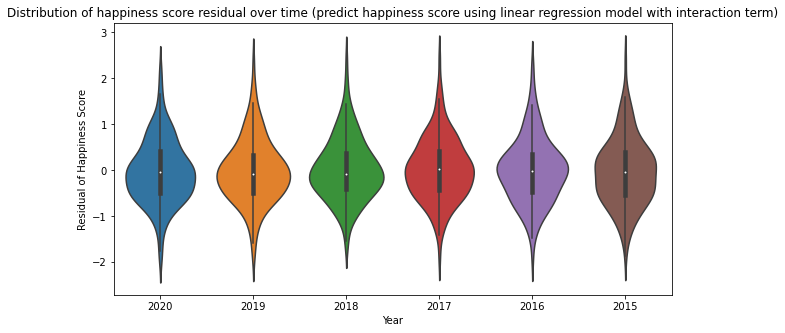

In [191]:
##### Now create linear regression model by year and region using interaction tern ##############

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgels")

X = dataAll[['Year', 'Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', \
             'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', \
             'Sub-Saharan Africa', 'Western Europe']]
Y = dataAll['Happiness Score']

# Create interaction term
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

# Create linear regression
regr = LinearRegression()

# Fit the linear regression
model = regr.fit(X_inter, Y)


# Get predicted value
Y_predict = regr.predict(X_inter)

#Get coefficient and intercept
coefficient = regr.coef_
intercept = regr.intercept_
print (f"Coefficient: {coefficient}\nIntercept: {intercept}")

# Get mean squared error & R^2
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_predict))
print('R^2 score: %.2f'
          % r2_score(Y, Y_predict))


# Get residual
Y_residual = Y_predict - Y

# Add the residual column
dataAll['Happiness Residual 2'] = Y_residual

#Plot the residual distribution over years
plt.figure(figsize=(10,5)) #Format figure size
sns.violinplot(x='Year', y='Happiness Residual 2', data=dataAll) \
    .set( xlabel="Year", ylabel="Residual of Happiness Score")
plt.title("Distribution of happiness score residual over time (predict happiness score using linear regression model with interaction term)")
plt.show()


### Write up: Mean squared error decreases. Residual plot looks normal. Not bimodal anymore. Mean squared error has been improved. 

<h2><center>Analyze factors that affect happiness in each year</center></h2>

In [192]:
def factors_affected_happiness_by_year(year):
    # Get year dataframe
    year_df = dataAll[dataAll["Year"] == year]
    
    #Get X and Y axes
    features_X = year_df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
    happiness_Y = year_df['Happiness Score']
    
    # Linear Regression
    regr = linear_model.LinearRegression()
    regr.fit(features_X, happiness_Y)
    
    # Parameters
    params_df = pd.DataFrame([regr.coef_],
                            columns = ['Economy', 'Family', 'Health', 'Freedom', 'Government', 'Generosity'])
    params_df["Intercept"] = regr.intercept_
    print(params_df)
    
    # Get predicted value
    happiness_Y_predict = regr.predict(features_X)

    # Get mean squared error:
    print()
    print('Mean squared error: %.2f'
          % mean_squared_error(happiness_Y, happiness_Y_predict))
    print('R^2 score: %.2f'
          % r2_score(happiness_Y, happiness_Y_predict))

In [181]:
factors_affected_happiness_by_year("2015")

    Economy    Family    Health   Freedom  Government  Generosity  Intercept
0  0.860657  1.408892  0.975309  1.333433    0.784538    0.388933   1.860185

Mean squared error: 0.29
R^2 score: 0.78


### Writeup (2015):
Family > Freedom > Life Expectancy > Economy (GDP) > Government Trust > Generosity

In [182]:
factors_affected_happiness_by_year("2016")

    Economy    Family    Health   Freedom  Government  Generosity  Intercept
0  0.721413  1.229754  1.436403  1.513935    0.918927    0.159494   2.190294

Mean squared error: 0.28
R^2 score: 0.79


### Writeup (2016):
Freedom > Life Expectancy > Family > Government Trust > Economy > Generosity

In [183]:
factors_affected_happiness_by_year("2017")

    Economy   Family    Health   Freedom  Government  Generosity  Intercept
0  0.794919  1.14852  1.330857  1.407979     0.95305    0.393118   1.684468

Mean squared error: 0.23
R^2 score: 0.81


### Writeup (2017):
Freedom > Life Expectancy > Family > Government Trust > Economy > Generosity

In [184]:
factors_affected_happiness_by_year("2018")

    Economy    Family    Health   Freedom  Government  Generosity  Intercept
0  0.888664  1.221054  0.931914  1.355804    0.800946    0.463499   1.746957

Mean squared error: 0.26
R^2 score: 0.79


### Writeup (2018):
Freedom > Family > Life Expectancy > Economy  > Government Trust > Generosity

In [185]:
factors_affected_happiness_by_year("2019")

    Economy    Family    Health   Freedom  Government  Generosity  Intercept
0  0.766022  1.244737  1.008123  1.407431    1.072692    0.406235   1.734016

Mean squared error: 0.28
R^2 score: 0.77


### Writeup (2019):
Freedom > Family > Government Trust > Life Expectancy > Economy > Generosity

In [186]:
factors_affected_happiness_by_year("2020")

    Economy  Family    Health   Freedom  Government  Generosity  Intercept
0  0.739118   1.153  0.980704  1.482473    0.972943    0.620785   1.887211

Mean squared error: 0.31
R^2 score: 0.75


### Writeup (2020):
Freedom > Family > Life Expectancy > Government Trust > Economy > Generosity